In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import rc
import matplotlib as mpl

In [2]:
colors=["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]

def plotsettings(col=False):
    rc('text.latex', preamble='\\usepackage{txfonts}')
    rc('text', usetex=True)
    rc('font', family='serif')
    rc('font', serif='times')
    rc('font', size=12)
    rc('mathtext', default='sf')
    rc("lines", markeredgewidth=1)
    rc("lines", linewidth=2)
    rc('axes', labelsize=12)  # 24
    rc('axes', titlesize=12)
    rc("axes", linewidth=0.5)  # 2)
    rc('xtick', labelsize=13)
    rc('ytick', labelsize=13)
    rc('legend', fontsize=13)  # 16
    rc('xtick.major', pad=6)  # 8)
    rc('ytick.major', pad=6)  # 8)
    rc('xtick.minor', size=8)  # 8)
    rc('ytick.minor', size=8)  # 8)
    if col:
        mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) 
plotsettings(col=True)

/Users/uddeeptadeka/opt/miniconda3/envs/lensing/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  warnings.warn('nperseg = {0:d} is greater than input length '
/var/folders/df/5sy3qvyj7tv9g58gx9vx5hz80000gn/T/ipykernel_22734/2185581649.py:14: RuntimeWarning: invalid value encountered in multiply
  amplitude = np.sqrt((sigma**2) * np.exp(-2 * (k**2) * (correlation_length**2)))


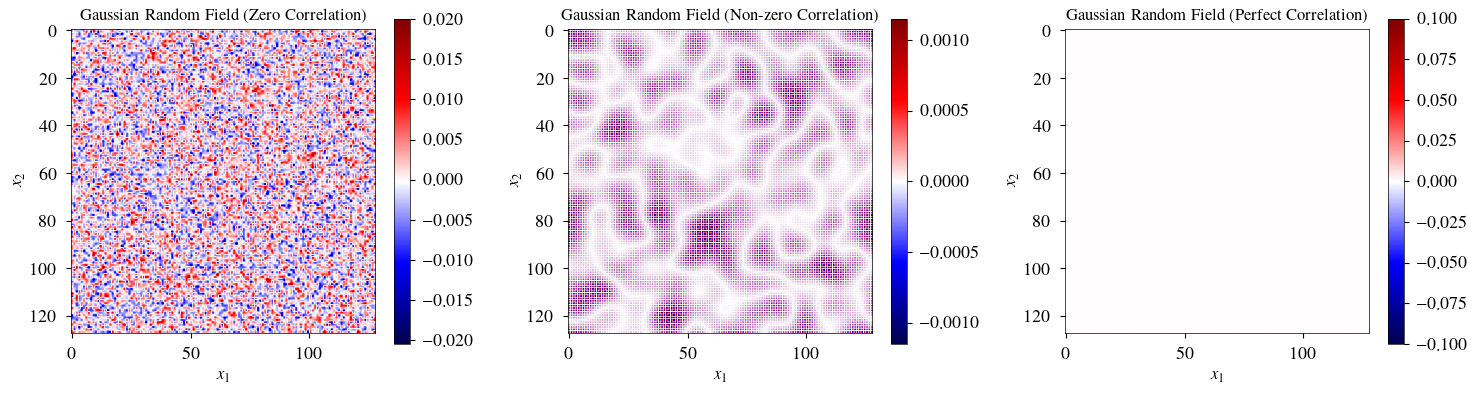

In [64]:
def generate_gaussian_random_field(shape, delta=1.0, correlation_length=0.0, sigma=1.0):
    assert len(shape) == 2, "Shape must be 2-dimensional"
    assert delta > 0, "Delta must be positive"
    assert correlation_length >= 0, "Correlation length must be non-negative"
    assert sigma > 0, "Sigma must be positive"

    nx, ny = shape
    kx = np.fft.fftfreq(nx, d=delta)
    ky = np.fft.fftfreq(ny, d=delta)
    kx, ky = np.meshgrid(kx, ky)
    k = np.sqrt(kx**2 + ky**2)

    # Generate random complex numbers with normal distribution
    amplitude = np.sqrt((sigma**2) * np.exp(-2 * (k**2) * (correlation_length**2)))
    phase = np.random.uniform(0, 2 * np.pi, size=(nx, ny))
    field = amplitude * np.exp(1j * phase)

    # Set zero frequency component to zero
    field[0, 0] = 0.0

    # Apply inverse Fourier transform
    random_field = np.fft.ifft2(np.fft.ifftshift(field)).real

    return random_field

def compute_power_spectral_density(random_field, delta=1.0):
    freq, psd = signal.welch(random_field, fs=1.0 / delta, axis=0)
    return freq, psd

# Example usage

# Parameters
shape = (128, 128)
delta = 1.0
correlation_length = 0.0  # Zero correlation length
sigma = 1.0

# Generate random field with zero correlation
random_field_zero_corr = generate_gaussian_random_field(shape, delta, correlation_length, sigma)
freq_zero_corr, psd_zero_corr = compute_power_spectral_density(random_field_zero_corr, delta)

# Generate random field with non-zero correlation
correlation_length_nonzero = 20.0
random_field_nonzero_corr = generate_gaussian_random_field(shape, delta, correlation_length_nonzero, sigma)
freq_nonzero_corr, psd_nonzero_corr = compute_power_spectral_density(random_field_nonzero_corr, delta)

# Generate random field with perfect correlation
correlation_length_perfect = np.inf
random_field_perfect_corr = generate_gaussian_random_field(shape, delta, correlation_length_perfect, sigma)
freq_perfect_corr, psd_perfect_corr = compute_power_spectral_density(random_field_perfect_corr, delta)

# Plot random fields and power spectral densities
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
cmap='seismic'

# Random field with zero correlation
im1 = axes[0].imshow(random_field_zero_corr, cmap=cmap)
axes[0].set_title("Gaussian Random Field (Zero Correlation)")
plt.colorbar(im1, ax=axes[0])
axes[0].set_xlabel(r'$x_1$')
axes[0].set_ylabel(r'$x_2$')

# Random field with non-zero correlation
im2 = axes[1].imshow(random_field_nonzero_corr, cmap=cmap)
axes[1].set_title("Gaussian Random Field (Non-zero Correlation)")
plt.colorbar(im2, ax=axes[1])
axes[1].set_xlabel(r'$x_1$')
axes[1].set_ylabel(r'$x_2$')

# Random field with perfect correlation
im3 = axes[2].imshow(random_field_perfect_corr, cmap=cmap)
axes[2].set_title("Gaussian Random Field (Perfect Correlation)")
plt.colorbar(im3, ax=axes[2])
axes[2].set_xlabel(r'$x_1$')
axes[2].set_ylabel(r'$x_2$')

plt.tight_layout()
# plt.savefig("grf.png", bbox_inches='tight', transparent=True, dpi=200)
plt.show()


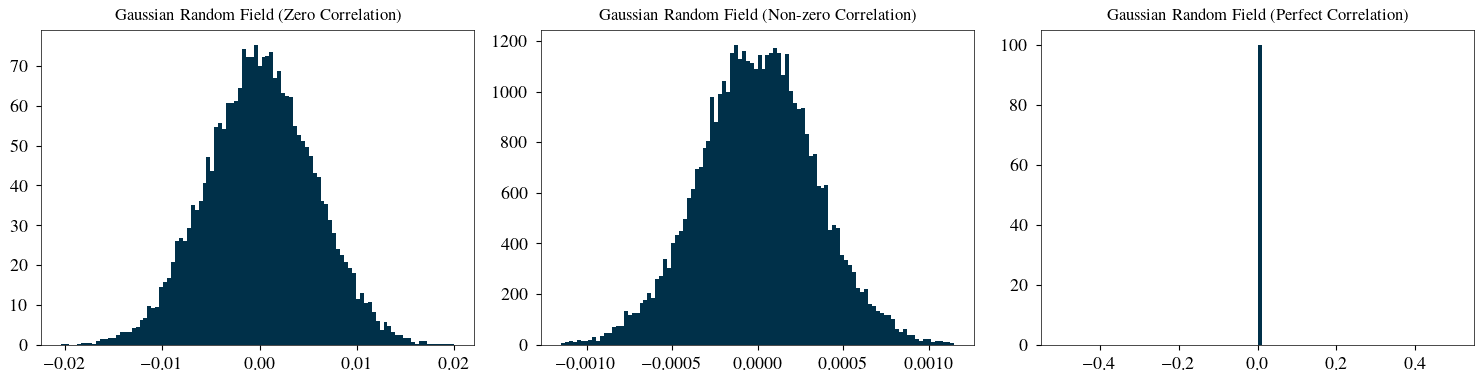

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
cmap='seismic'

# Random field with zero correlation
axes[0].hist(random_field_zero_corr.flatten(), bins=100, density=True)
axes[0].set_title("Gaussian Random Field (Zero Correlation)")

# Random field with non-zero correlation
axes[1].hist(random_field_nonzero_corr.flatten(), bins=100, density=True)
axes[1].set_title("Gaussian Random Field (Non-zero Correlation)")
# Random field with perfect correlation
axes[2].hist(random_field_perfect_corr.flatten(), bins=100, density=True)
axes[2].set_title("Gaussian Random Field (Perfect Correlation)")

plt.tight_layout()
# plt.savefig("grf-hist.png", bbox_inches='tight', transparent=True, dpi=200)
plt.show()

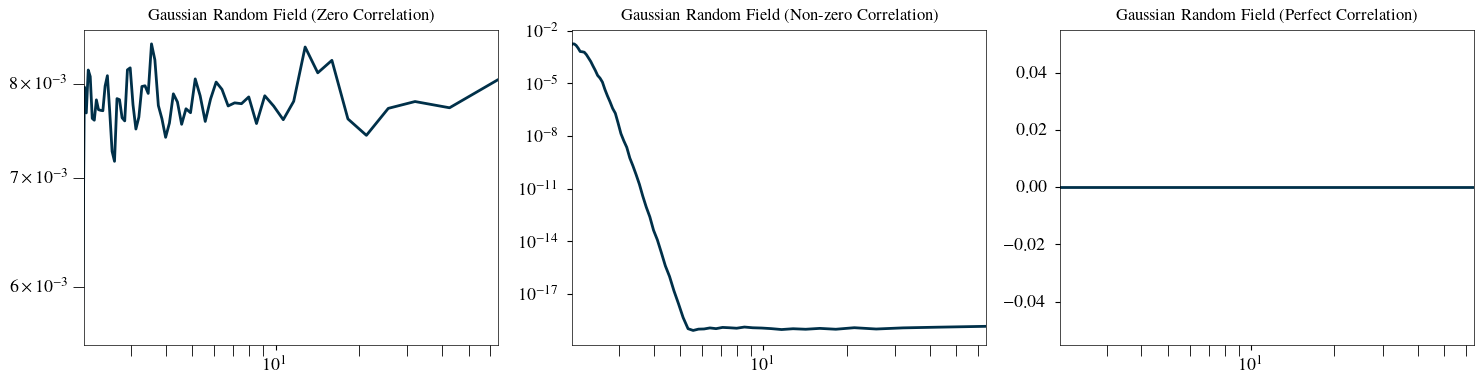

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
cmap='seismic'

# Random field with zero correlation
axes[0].loglog(1./freq_zero_corr[1:], np.sqrt(psd_zero_corr.mean(axis=1)[1:]))
axes[0].set_title("Gaussian Random Field (Zero Correlation)")
axes[0].set_xlim(1./freq_zero_corr[-2], 1./freq_zero_corr[2])
# Random field with non-zero correlation
axes[1].loglog(1./freq_nonzero_corr[1:], np.sqrt(psd_nonzero_corr.mean(axis=1)[1:]))
axes[1].set_title("Gaussian Random Field (Non-zero Correlation)")
axes[1].set_xlim(1./freq_nonzero_corr[-2], 1./freq_nonzero_corr[2])
# Random field with perfect correlation
axes[2].semilogx(1./freq_perfect_corr[1:], np.sqrt(psd_perfect_corr.mean(axis=1)[1:]))
axes[2].set_title("Gaussian Random Field (Perfect Correlation)")
axes[2].set_xlim(1./freq_perfect_corr[-2], 1./freq_perfect_corr[2])
plt.tight_layout()
# plt.savefig("grf-psd.png", bbox_inches='tight', transparent=True, dpi=200)
plt.show()
